In [1]:
from warnings import filterwarnings as w
w('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set(style='darkgrid', context='talk',      
        palette=['#62C370', '#FFD166', '#EF476F'])

In [2]:
dataset = pd.read_csv(r"C:\terror.csv", encoding = 'ISO-8859-1') 
data = dataset.copy()

In [3]:
#Selecting significant columns
features = ['iyear','imonth','iday', 'extended','country_txt','region_txt','city',
      'latitude','longitude','success','suicide', 'attacktype1_txt', 'targtype1_txt', 'target1','natlty1_txt', 'gname', 
      'weaptype1_txt','nkill','motive']

data = data[features]



#Renaming the columns for better interpretability 
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'day','extended':'over24hrs','country_txt':'country',
                    'region_txt':'region','suicide':'suicide_attack','attacktype1_txt':'attacktype',
                    'targtype1_txt':'target_type','target1':'target','natlty1_txt':'target_nationality','gname':'terror_grp',
                    'weaptype1_txt':'weapon_used','nkill':'total_killed'}, inplace = True)

#altering the values for better visualizations
data['country'] = data.country.apply(lambda x: 'Congo' if x== 'Democratic Republic of the Congo' else x)
data['country'] = data.country.apply(lambda x: 'UK' if x== 'United Kingdom' else x)
data['country'] = data.country.apply(lambda x: 'USA' if x== 'United States' else x)
data['weapon_used'] = data['weapon_used'].apply(lambda x: 'Vehicle(No Car Bombs)' if 'Vehicle' in x else x)
data['terror_grp'] = data['terror_grp'].apply(lambda x: x.split("(")[1] if "(" in x else x)
data['terror_grp'] = data['terror_grp'].apply(lambda x: x.split(")")[0] if ")" in x else x)

In [4]:
data.isnull().sum()

Year                       0
Month                      0
day                        0
over24hrs                  0
country                    0
region                     0
city                     434
latitude                4556
longitude               4557
success                    0
suicide_attack             0
attacktype                 0
target_type                0
target                   636
target_nationality      1559
terror_grp                 0
weapon_used                0
total_killed           10313
motive                131130
dtype: int64

In [5]:
data.columns

Index(['Year', 'Month', 'day', 'over24hrs', 'country', 'region', 'city',
       'latitude', 'longitude', 'success', 'suicide_attack', 'attacktype',
       'target_type', 'target', 'target_nationality', 'terror_grp',
       'weapon_used', 'total_killed', 'motive'],
      dtype='object')

In [6]:
#EDA

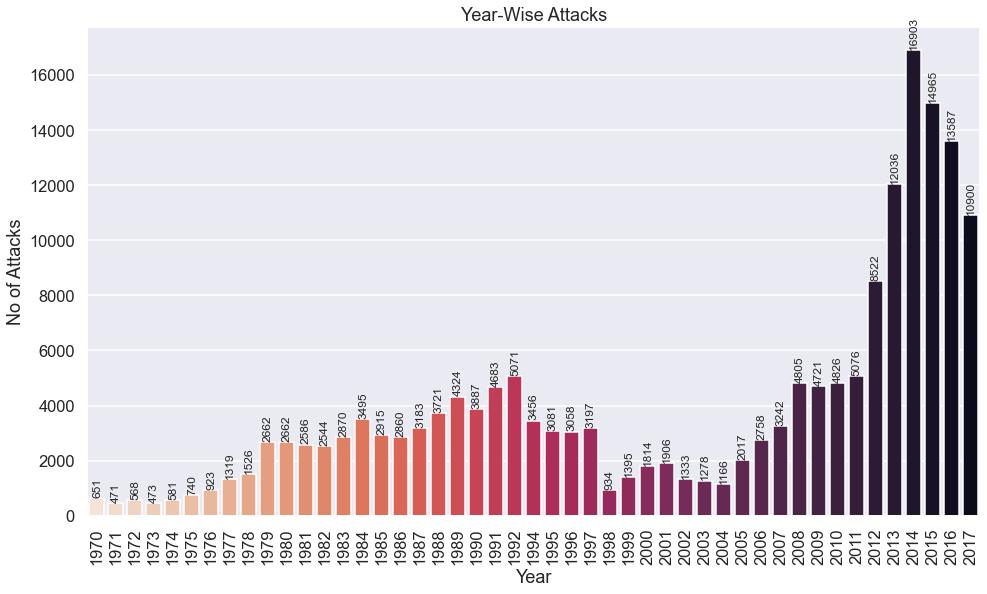

In [7]:
plt.figure(figsize = (16,9))
ax = sns.countplot(data['Year'], palette = 'rocket_r')
plt.xticks(rotation = 90)
plt.ylabel("No of Attacks") 
plt.title("Year-Wise Attacks")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+100), rotation = 90, size =12)

plt.show()

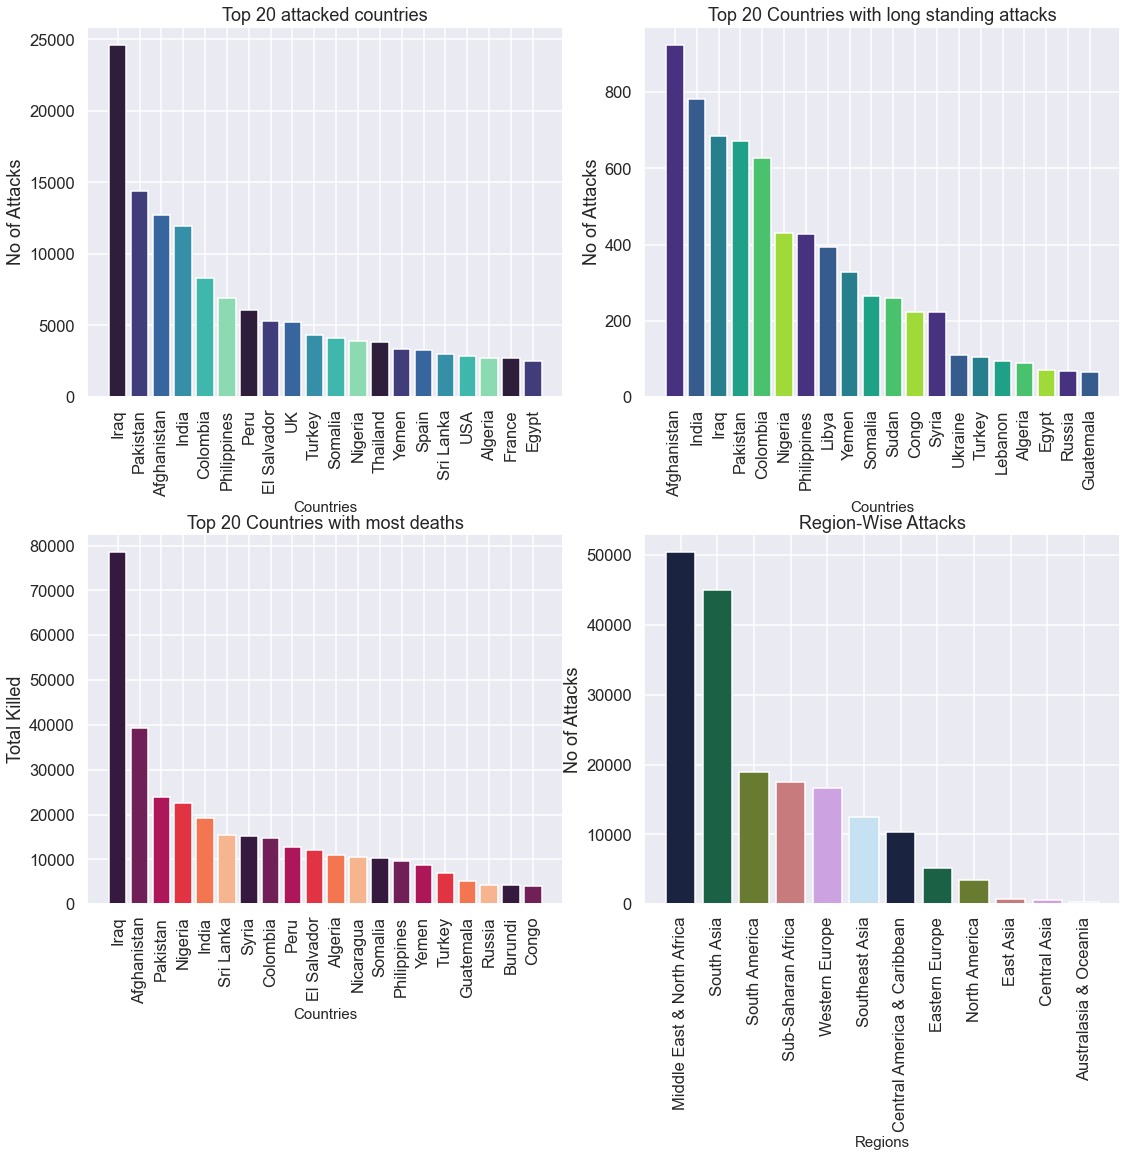

In [8]:
fig = plt.figure(figsize = (16,13))
ax1 = fig.add_subplot(221)
ax1.bar(x = data['country'].value_counts().index[:20], height = data['country'].value_counts()[:20], color = sns.color_palette('mako'))
plt.xticks(rotation = 90)
plt.xlabel("Countries", fontsize = 15)
plt.ylabel("No of Attacks")
ax1.title.set_text('Top 20 attacked countries')


over24cntrs = data[data['over24hrs'] == 1][['country','over24hrs']].groupby(['country']).sum().nlargest(20, 'over24hrs')
ax2 = fig.add_subplot(222)
ax2.bar(x = over24cntrs.index, height = over24cntrs['over24hrs'], color = sns.color_palette('viridis'))
plt.xticks(rotation = 90)
plt.xlabel("Countries", fontsize = 15)
plt.ylabel("No of Attacks")
ax2.title.set_text('Top 20 Countries with long standing attacks')

fig.tight_layout()
mostkill = data[['country','total_killed']].groupby(['country']).sum().nlargest(20, 'total_killed').astype(int)
ax3 = fig.add_subplot(223)
ax3.bar(x = mostkill.index, height = mostkill['total_killed'], color = sns.color_palette('rocket'))
plt.xticks(rotation = 90)
plt.xlabel("Countries", fontsize = 15)
plt.ylabel("Total Killed")
ax3.title.set_text('Top 20 Countries with most deaths')


ax4 = fig.add_subplot(224)
ax4.bar(x = data['region'].value_counts().index,height =  data['region'].value_counts(), color = sns.color_palette('cubehelix'))
plt.xticks(rotation = 90)
plt.xlabel("Regions", fontsize = 15)
plt.ylabel("No of Attacks")
ax4.title.set_text('Region-Wise Attacks')


fig.tight_layout(rect=[0.1, 1.2, 1.8, 0.95]) #Left, Bottom, Top, RIght
plt.show()

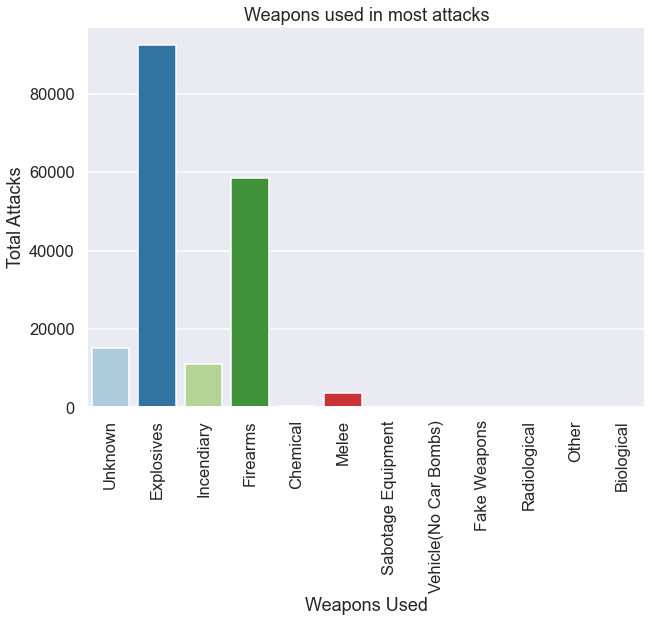

In [9]:
plt.figure(figsize = (10,7))
sns.countplot(data['weapon_used'] , palette = 'Paired')
plt.xticks(rotation = 90)
plt.ylabel("Total Attacks")
plt.xlabel("Weapons Used")
plt.title("Weapons used in most attacks")
plt.show()

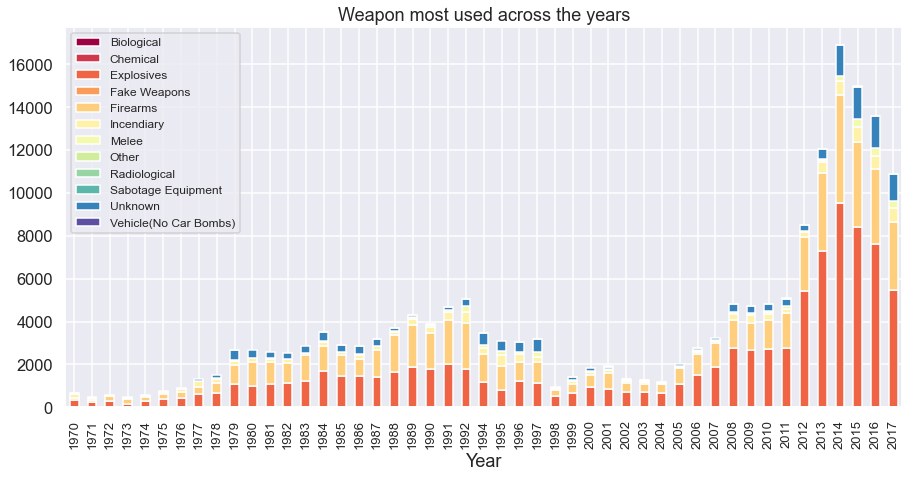

In [10]:
df = data.groupby(['weapon_used', 'Year']).size().reset_index().pivot(columns='weapon_used', index='Year', values=0)
df.plot(kind = 'bar', stacked = True, figsize = (15,7), colormap = 'Spectral')
plt.legend(loc=2, prop = {'size':12})
plt.xticks(fontsize = 13)
plt.title("Weapon most used across the years")
plt.show()

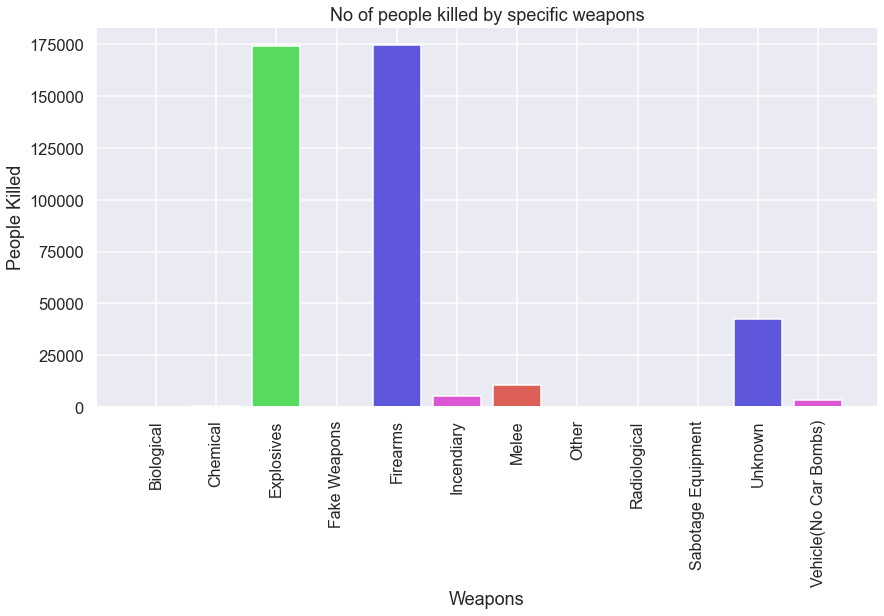

In [11]:
weapon_kills = data[['weapon_used','total_killed']].groupby(by = 'weapon_used').sum()
plt.figure(figsize = (14,7))
plt.bar(x = weapon_kills.index, height = weapon_kills['total_killed'], color = sns.color_palette('hls'))
plt.xticks(fontsize = 16, rotation = 90)
plt.xlabel('Weapons')
plt.ylabel("People Killed")
plt.title("No of people killed by specific weapons")
plt.show()

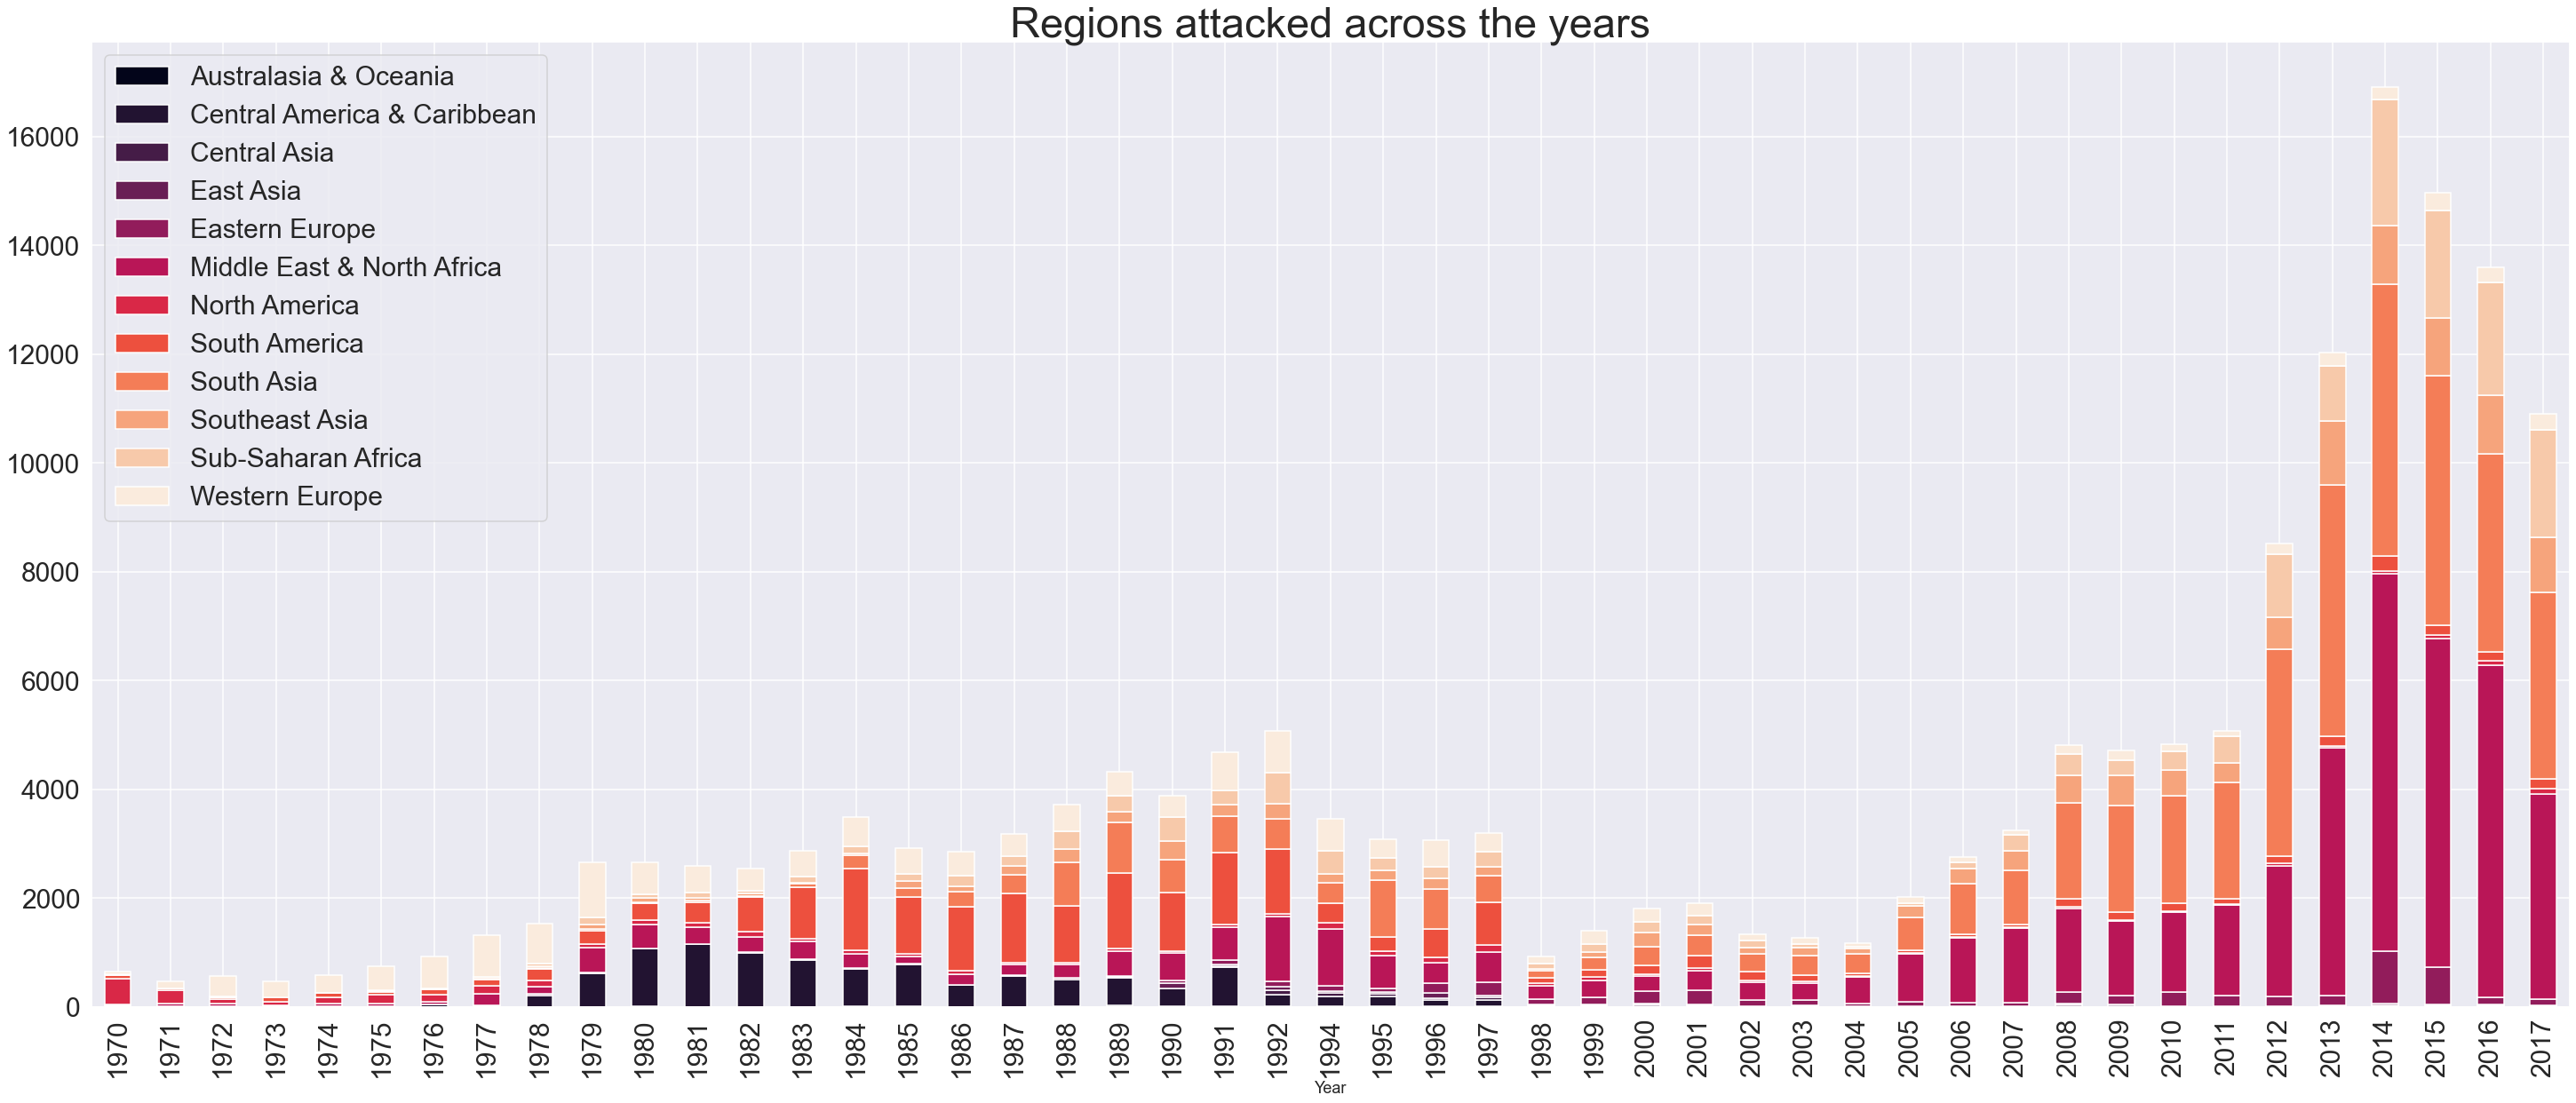

In [12]:
df = data.groupby(['region', 'Year']).size().reset_index().pivot(columns='region', index='Year', values=0)
df.plot(kind = 'bar', stacked = True, figsize = (50,20), colormap = 'rocket')
plt.legend(loc=2, prop = {'size':30})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.title("Regions attacked across the years", fontsize = 47)
plt.show()

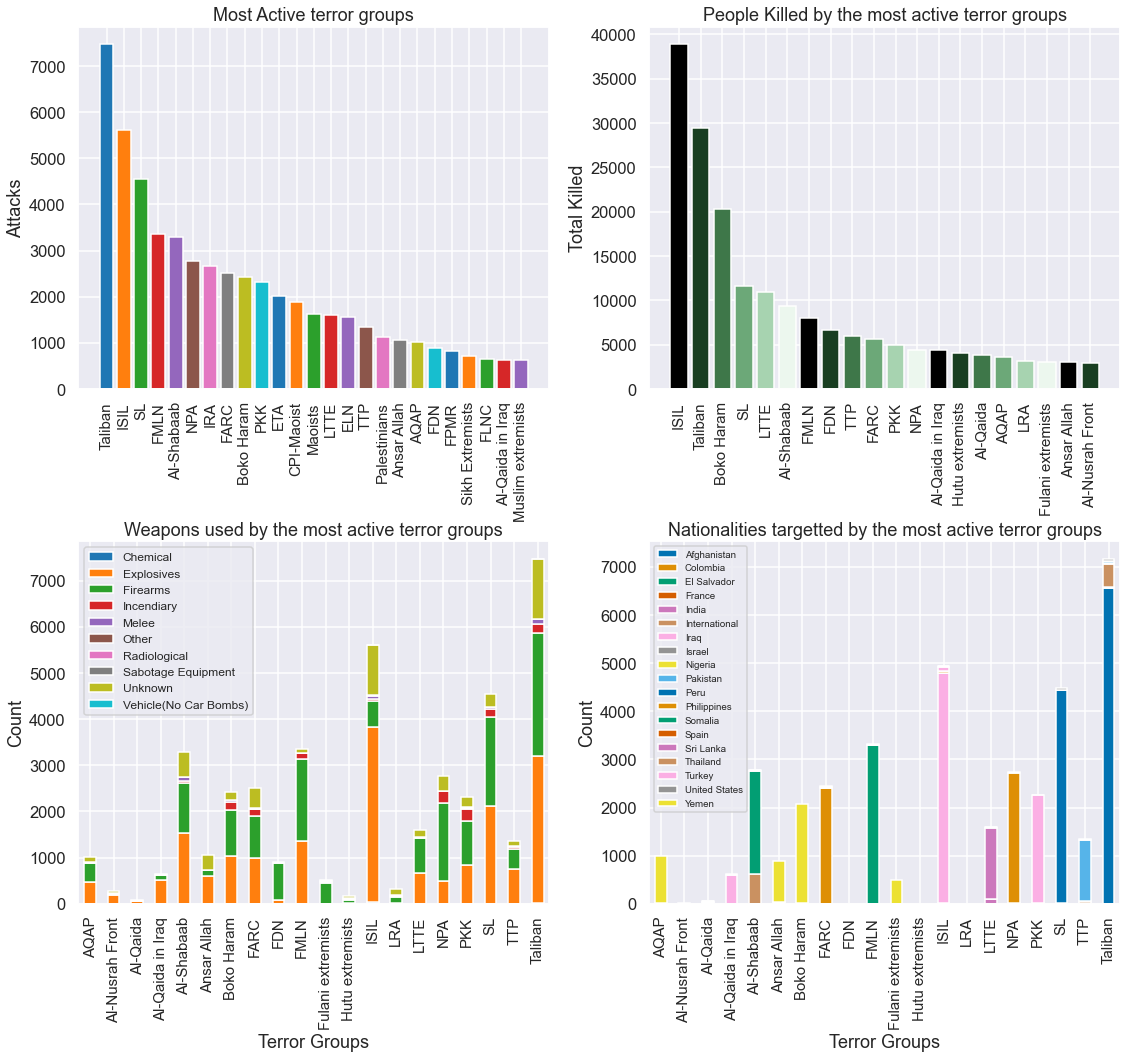

In [13]:
fig = plt.figure(figsize = (16,13))
df1 = data[data['terror_grp'] != 'Unknown'] 
ax1 = fig.add_subplot(221)
plt.bar(x = df1['terror_grp'].value_counts().index[:25], height = df1['terror_grp'].value_counts()[:25], color = sns.color_palette('tab10'))
plt.xticks(fontsize = 15, rotation = 90)
plt.ylabel("Attacks")
ax1.title.set_text('Most Active terror groups')


ax2 = fig.add_subplot(222)
top20 = df1[['terror_grp','total_killed']].groupby(by = 'terror_grp').sum().nlargest(20, 'total_killed')
plt.bar(x = top20.index, height = top20['total_killed'], color= sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True))
plt.xticks(fontsize = 15,rotation = 90)
plt.ylabel("Total Killed") 
ax2.title.set_text('People Killed by the most active terror groups')

fig.tight_layout()
ax3 = fig.add_subplot(223)
df2 = data[data['terror_grp'].isin(list(top20.index))]
df2 = df2[df2['terror_grp'] != 'Unknown']
df2 = df2.groupby(['weapon_used', 'terror_grp']).size().reset_index().pivot(columns='weapon_used', index='terror_grp', values=0)
df2.plot(kind = 'bar', stacked = True, color= sns.color_palette('tab10'), ax=ax3)
plt.legend(loc=2, prop = {'size':12})
plt.xticks(fontsize = 15)
plt.xlabel("Terror Groups")
plt.ylabel("Count")
ax3.title.set_text('Weapons used by the most active terror groups')

ax4 = fig.add_subplot(224)
ntly20 = list(data['target_nationality'].value_counts().index[:20])
df4 = data[data['terror_grp'].isin(list(top20.index))]
df4 = df4[df4['target_nationality'].isin(ntly20)]
df4 = df4.groupby(['target_nationality', 'terror_grp']).size().reset_index().pivot(columns='target_nationality', index='terror_grp', values=0)
df4.plot(kind = 'bar', stacked = True, color= sns.color_palette('colorblind'), ax=ax4)
plt.legend(loc=2, prop = {'size':9.7})
plt.xlabel("Terror Groups")
plt.xticks(fontsize = 15)
plt.ylabel("Count")
ax4.title.set_text('Nationalities targetted by the most active terror groups')


fig.tight_layout(rect=[0.1, 1.2, 1.8, 0.95]) #Left, Bottom, Top, RIght
plt.show()

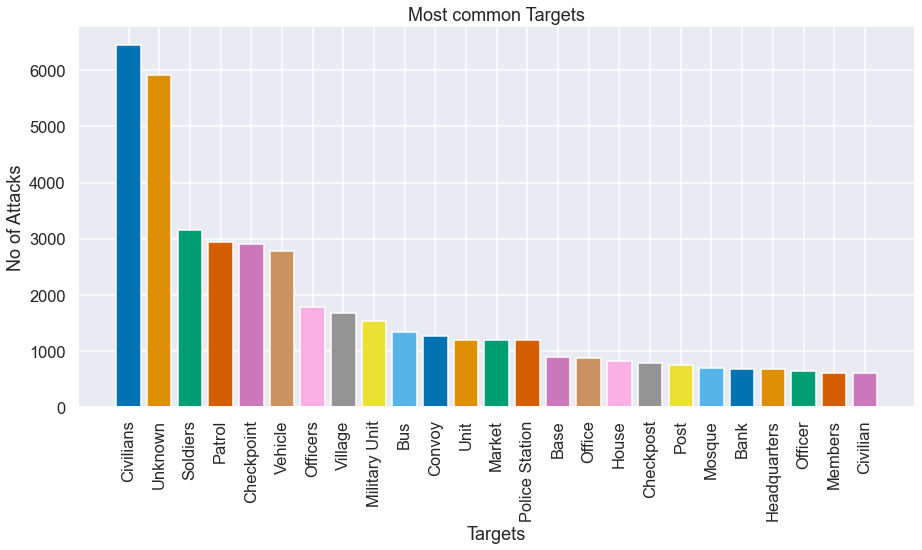

In [14]:
plt.figure(figsize = (15,7))
plt.bar(x = data['target'].value_counts().index[:25], height = data['target'].value_counts()[:25], color = sns.color_palette('colorblind'))
plt.xlabel("Targets")
plt.xticks(rotation = 90)
plt.ylabel("No of Attacks")
plt.title("Most common Targets")
plt.show()

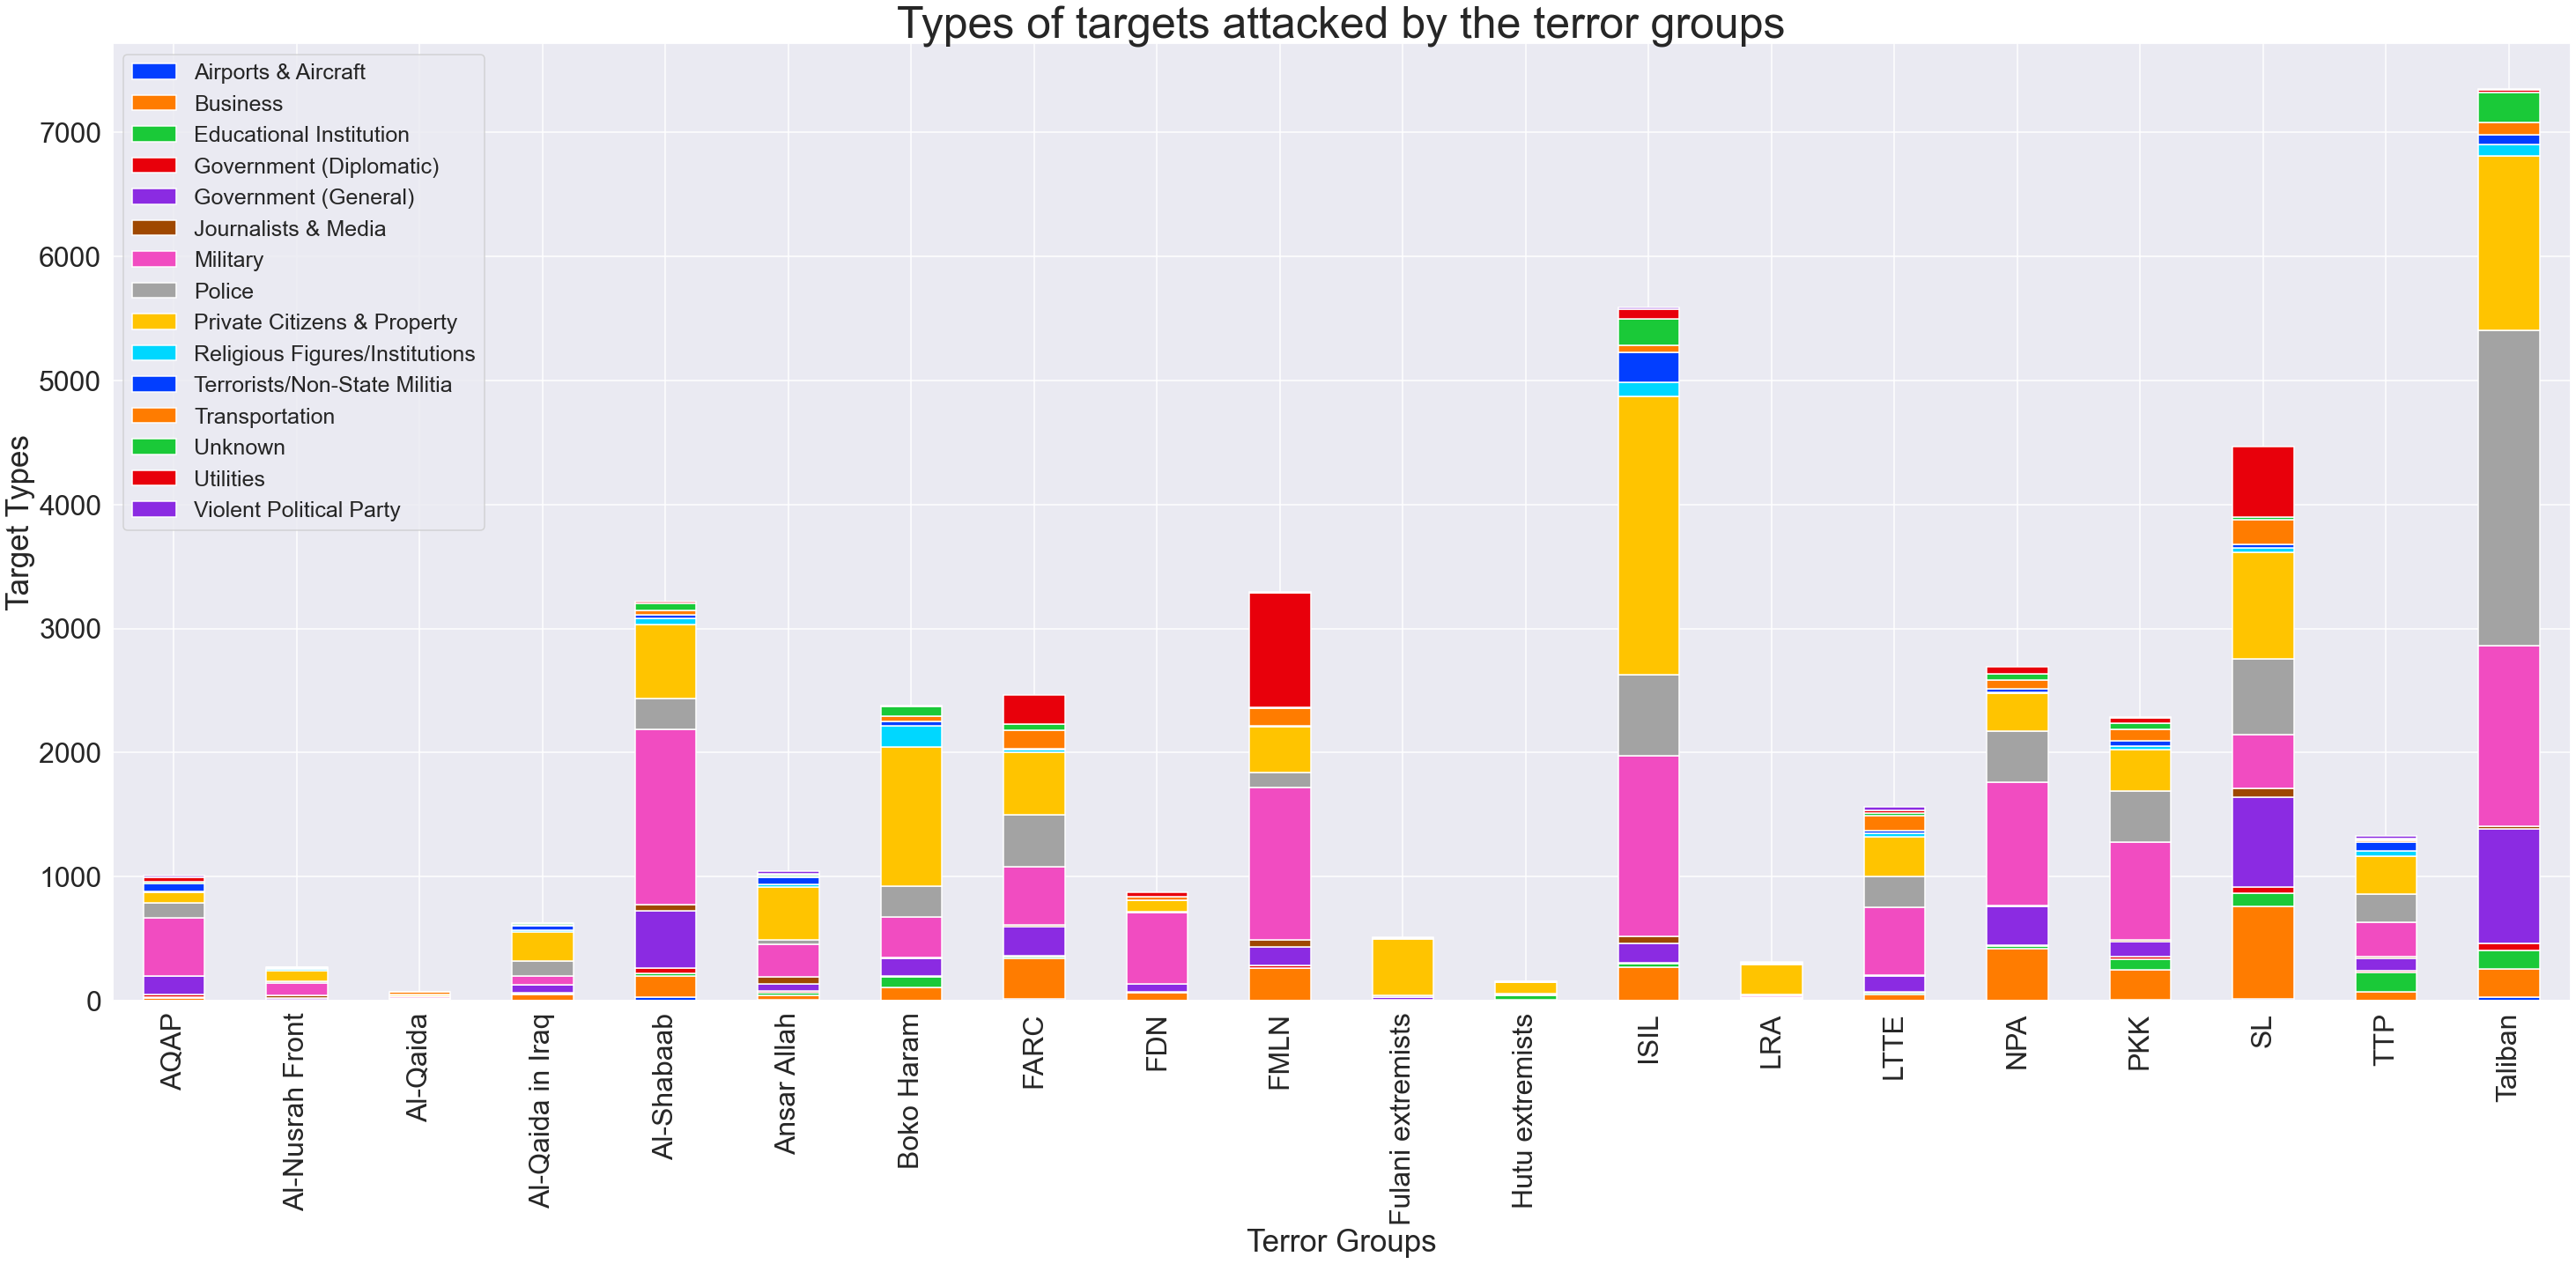

In [15]:
df4 = data[data['terror_grp'].isin(list(top20.index))]
df4 = df4[df4['target_type'].isin(list(data['target_type'].value_counts().index[:15]))]
df4 = df4.groupby(['target_type', 'terror_grp']).size().reset_index().pivot(columns='target_type', index='terror_grp', values=0)
df4.plot(kind = 'bar', stacked = True, figsize = (50,20),color= sns.color_palette('bright'))
plt.legend(loc=2, prop = {'size':25})
plt.xlabel("Terror Groups", fontsize = 35)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.ylabel("Target Types", fontsize = 35)
plt.title("Types of targets attacked by the terror groups", fontsize = 50)
plt.show()

In [16]:
data.shape

(181691, 19)